# Project 4 - Predicting Terrorism

In [2]:
import pandas as pd
import glob
import pandas as pd
import numpy as np

db = '/Users/jennydoyle/Desktop/dsi/04-project-assets/globalterrorismdb_0616dist.csv'
df = pd.read_csv(db, header=0,low_memory=False)
print 'Size = ',len(df)

Size =  156772


# I. EDA

In [2]:
def eda(dataframe):
    from IPython.core import display as ICD
    print "dataframe shape: ",dataframe.shape      ## rows by columns
    print ''
    print 'num duplicates:', dataframe.duplicated().sum() ## df.drop_duplicates() to remove dupes
    print ''
    print "pct missing values \n"
    ICD.display(pd.DataFrame(dataframe.isnull().sum()/len(df)*100),columns=['Columns','Pct Missing']), ## count number of null values per column
    print ''
    print "dataframe types \n"
    ICD.display(pd.DataFrame(dataframe.dtypes),columns=['Columns','Dtype'])       ## list data type of each column
    print ''
    print "dataframe describe \n"
    ICD.display(pd.DataFrame(dataframe.describe()))## stats -- mean, min, max, etc.. 
    print ''
    print '# unique values in series:\n'
    u_list = []
    for item in dataframe:                             ## count number of unique values per column
        u_list.append([item, dataframe[item].nunique()])
    unique_vals = pd.DataFrame(u_list,columns=['Column','Num_unique'])
    ICD.display(unique_vals)

eda(df)

dataframe shape:  (156772, 137)

num duplicates: 0

pct missing values 



,0
eventid,0.000000
iyear,0.000000
imonth,0.000000
iday,0.000000
approxdate,96.966295
extended,0.000000
resolution,97.766183
country,0.000000
country_txt,0.000000
region,0.000000



dataframe types 



,0
eventid,int64
iyear,int64
imonth,int64
iday,int64
approxdate,object
extended,int64
resolution,object
country,int64
country_txt,object
region,int64



dataframe describe 



,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.567720e+05,156772.000000,156772.000000,156772.000000,156772.000000,156772.000000,156772.000000,152253.000000,152253.000000,156772.000000,...,1.195000e+03,4.110000e+02,6.230000e+02,402.000000,8685.000000,8095.000000,156772.000000,156772.000000,156772.000000,156772.000000
mean,2.000541e+11,2000.474083,6.484666,15.455215,0.041347,133.087401,6.970097,23.190988,24.210467,1.452632,...,3.320127e+06,5.454451e+05,4.319721e+05,305.196517,4.592170,-27.788635,-4.834645,-4.789114,0.093894,-4.221124
std,1.298283e+09,12.982397,3.392225,8.815533,0.199091,113.946290,2.967803,19.220723,59.900831,1.016971,...,3.187694e+07,6.665967e+06,2.589893e+06,3409.027685,2.049184,58.524976,4.528862,4.589779,0.602442,4.686143
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.989082e+11,1989.000000,4.000000,8.000000,0.000000,69.000000,5.000000,10.756961,-1.929857,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.005071e+11,2005.000000,6.000000,15.000000,0.000000,101.000000,6.000000,31.285506,41.919647,1.000000,...,1.250000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.013060e+11,2013.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.842222,68.416974,1.000000,...,4.115000e+05,0.000000e+00,4.276840e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.015123e+11,2015.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000



# unique values in series:



,Column,Num_unique
0,eventid,156772
1,iyear,45
2,imonth,13
3,iday,32
4,approxdate,1426
5,extended,2
6,resolution,2657
7,country,206
8,country_txt,206
9,region,12


#### Standardize Country Names to join Dataframes

In [3]:
import geopandas as gpd
from shapely.geometry import Point
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


fix_names = {'Dem. Rep. Korea':'South Korea',
'Korea':'North Korea',
'Czech Rep.':'Czech Republic',
'Bosnia and Herz.':'Bosnia-Herzegovina',
'Bosnia and Herzegovina':'Bosnia-Herzegovina',
'Central African Rep.': 'Central African Republic',
 'Dem. Rep. Congo':  'Congo',
'Lao PDR':'Laos',
'Slovakia':'Slovak Republic'}

world.name.replace(fix_names, inplace=True)

fix_countries = {'Democratic Republic of the Congo':'Congo',
"People's Republic of the Congo"  :'Congo',
'Republic of the Congo':'Congo',
'Dominica':'Dominican Rep.',
'Dominican Republic':'Dominican Rep.',
'Czechoslovakia': 'Czech Republic',
'East Germany (GDR)':'Germany',
'East Timor':'Timor-Leste', 
'Equatorial Guinea':'Eq. Guinea',                
'Falkland Islands':'Falkland Is.',
'Hong Kong':'China',
'North Yemen':'Yemen',
'Serbia-Montenegro':'Serbia',
'Solomon Islands':'Solomon Is.',
'South Sudan':'Sudan',
'South Vietnam':'Vietnam',
'South Yemen':'Yemen',
'Soviet Union':'Russia',
'West Germany (FRG)':'Germany',                 
'Western Sahara':'W. Sahara'}

df.country_txt.replace(fix_countries, inplace=True)

### Types of Attacks

In [4]:
df.attacktype1_txt.value_counts()

Bombing/Explosion                      75963
Armed Assault                          37554
Assassination                          17582
Hostage Taking (Kidnapping)             9115
Facility/Infrastructure Attack          8849
Unknown                                 5490
Hostage Taking (Barricade Incident)      835
Unarmed Assault                          828
Hijacking                                556
Name: attacktype1_txt, dtype: int64

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'

plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

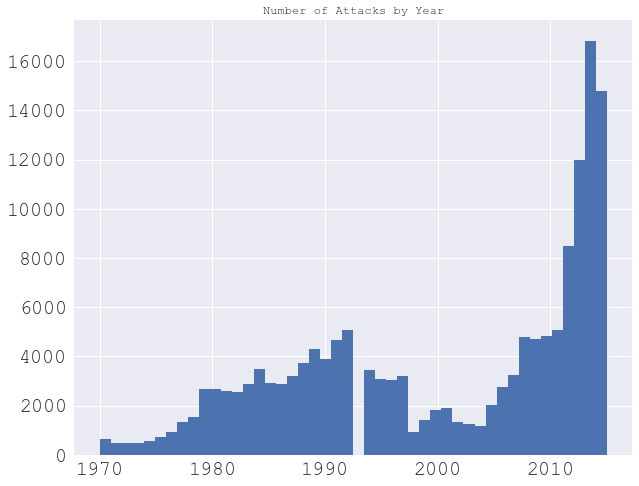

In [61]:
plt.hist(df.iyear,bins=46)
plt.title('Number of Attacks by Year')
plt.show()

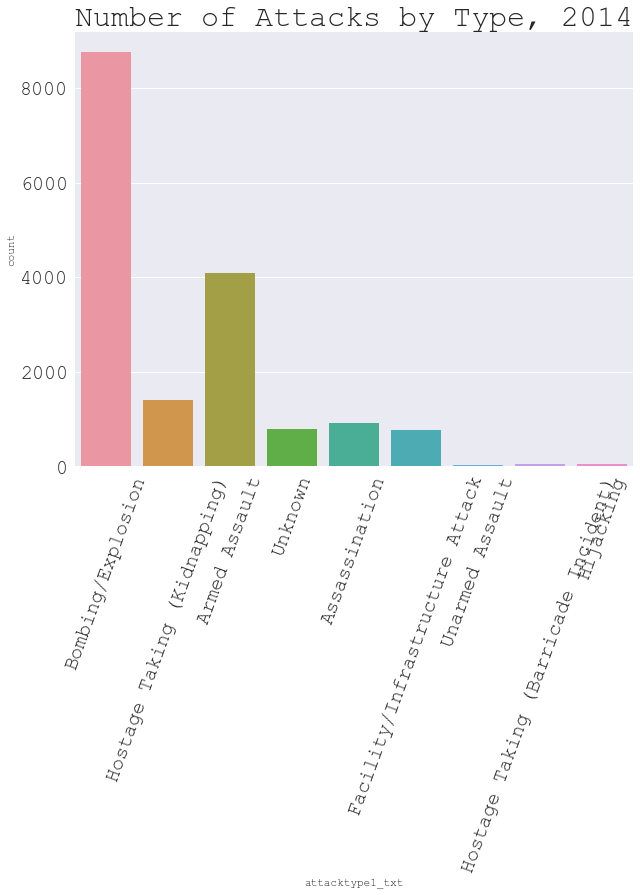

In [62]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
sns.countplot(x="attacktype1_txt", data=df[df.iyear==2014])
plt.title('Number of Attacks by Type, 2014',size=30)
plt.xticks(rotation=70)
plt.show()

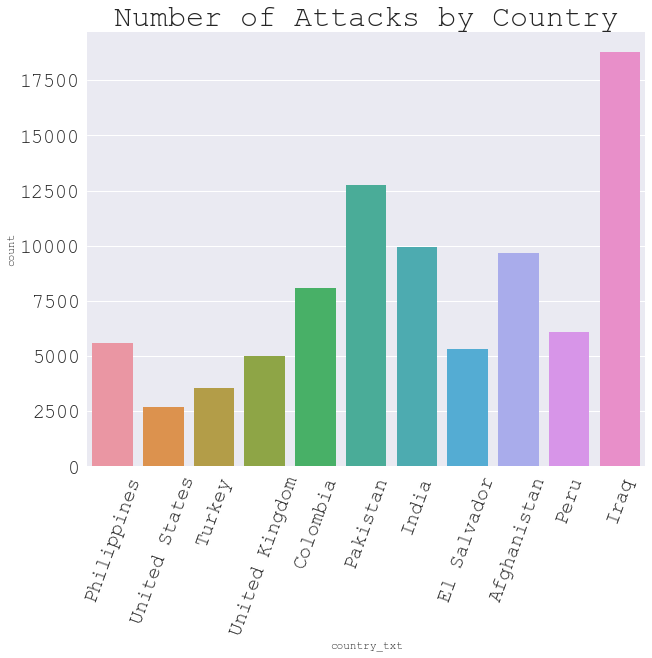

In [63]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
countries = df.groupby(['country_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
countries = list(countries.country_txt)
countries.append('United States')
mask = df[df.country_txt.isin(countries)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country',size=30)
plt.xticks(rotation=70)
plt.show()

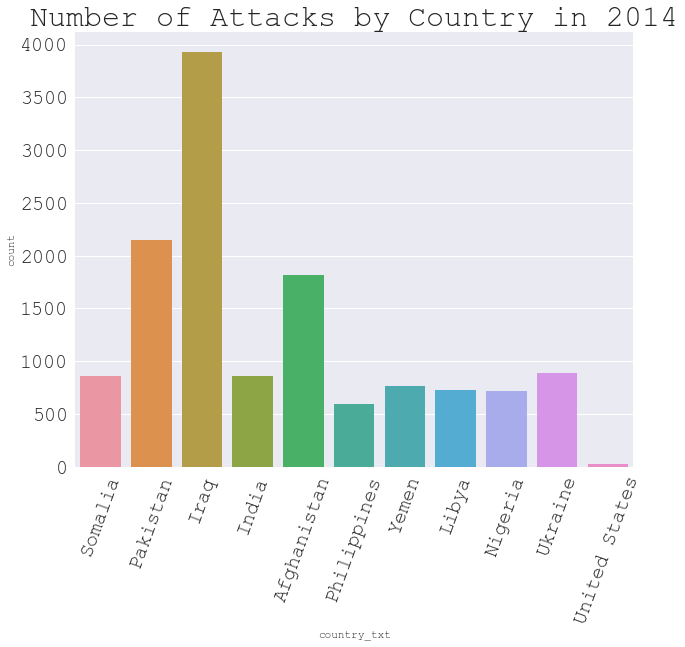

In [64]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
countries = df[df.iyear==2014].groupby(['country_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
countries = list(countries.country_txt)
countries.append('United States')
mask = df[(df.country_txt.isin(countries))&(df.iyear==2014)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country in 2014',size=30)
plt.xticks(rotation=70)
plt.show()

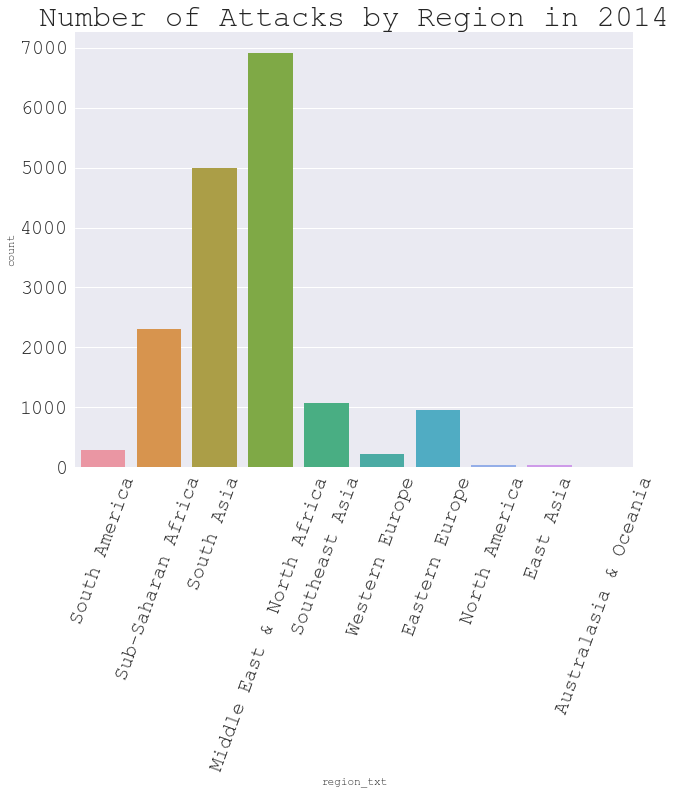

In [65]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
regions = df[df.iyear==2014].groupby(['region_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
regions = list(regions.region_txt)
mask = df[(df.region_txt.isin(regions))&(df.iyear==2014)]
sns.countplot(x="region_txt", data=mask)
plt.title('Number of Attacks by Region in 2014',size=30)
plt.xticks(rotation=70)
plt.show()

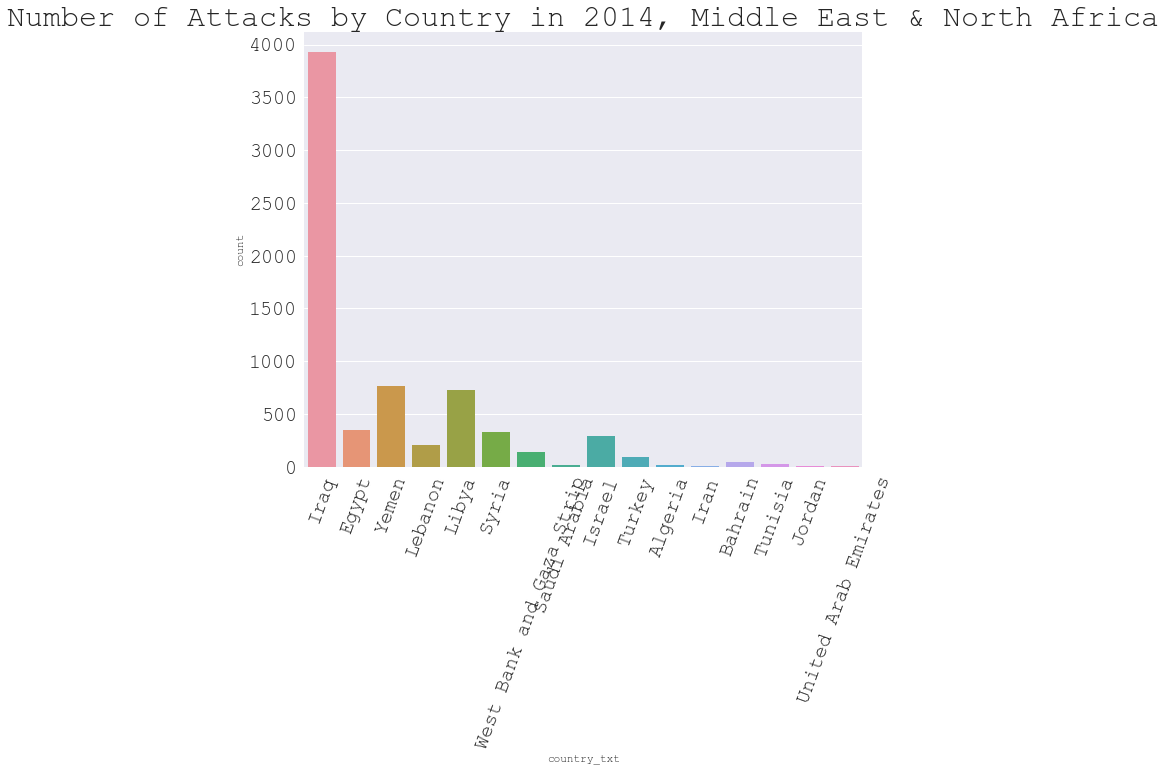

In [66]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
mask = df[(df.region_txt=='Middle East & North Africa')&(df.iyear==2014)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country in 2014, Middle East & North Africa',size=30)
plt.xticks(rotation=70)
plt.show()

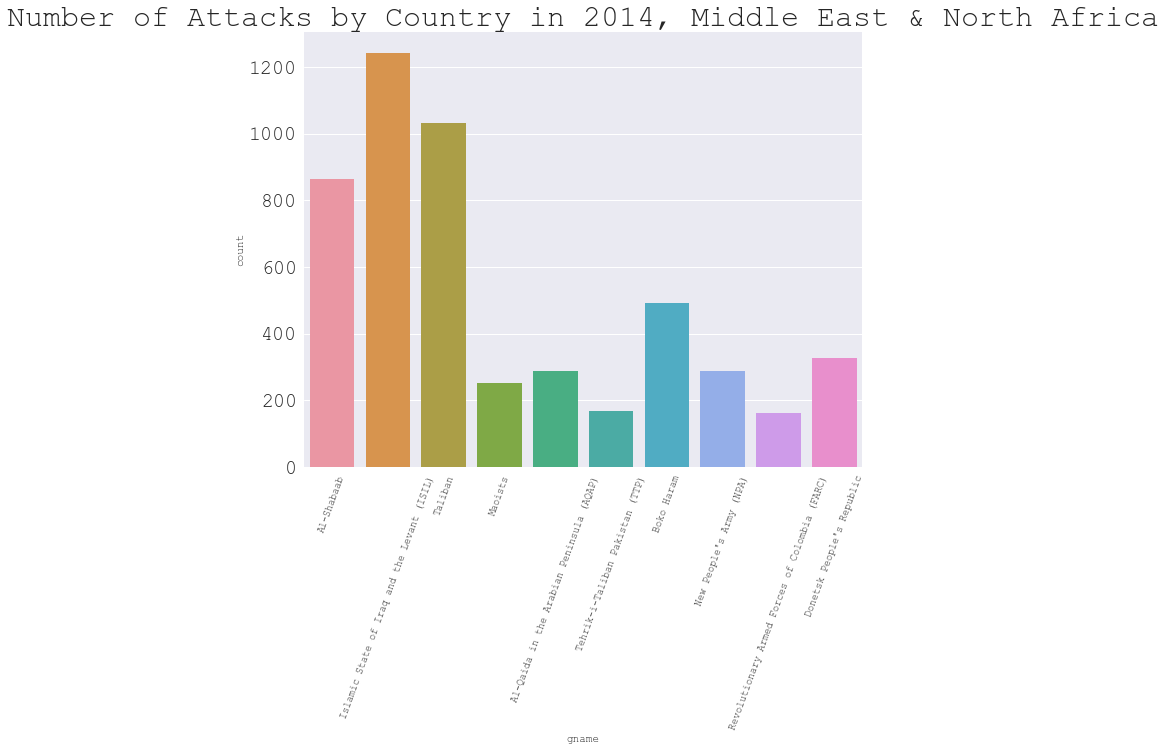

In [124]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 10 
plt.rcParams['ytick.labelsize'] = 20 
gnames = df[df.iyear==2014].groupby(['gname']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:11]
gnames = list(gnames.gname)[1:]
mask = df[(df.gname.isin(gnames))&(df.iyear==2014)]
sns.countplot(x="gname", data=mask)
plt.title('Number of Attacks by Country in 2014, Middle East & North Africa',size=30)
plt.xticks(rotation=70)
plt.show()

In [2]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000



In [128]:

# POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)
# INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER
# AUDIENCE(S) (CRIT2)
# OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)

feats = ['eventid','iyear','country_txt','region_txt','attacktype1_txt','attacktype2_txt','attacktype3_txt','crit1', 'crit2', 'crit3','success','suicide','weaptype1_txt','targtype1_txt','corp1','target1','natlty1_txt','gname','nperps','nkill','nwound','nhostkid','ransom']
df2 = df[feats]
# list(df.columns)

In [102]:
# df_before = df[df.region_txt=='Middle East & North Africa'][(df.iyear<2001)&(df.iyear>=1987)]
# df_after = df[df.region_txt=='Middle East & North Africa'][(df.iyear>2001)&(df.iyear<=2015)]



df_before = df[(df.iyear<2001)&(df.iyear>=1987)]
df_after = df[(df.iyear>2001)&(df.iyear<=2015)]


In [6]:
types = pd.DataFrame(df_before[['attacktype1_txt','attacktype1','attacktype2','attacktype3']].groupby('attacktype1_txt').count()).reset_index()
types['num_before'] = types.attacktype1+types.attacktype2+types.attacktype3
types = types[['attacktype1_txt','num_before']]
types['pct_before'] = types.num_before / len(df_before)


types_temp = pd.DataFrame(df_after[['attacktype1_txt','attacktype1','attacktype2','attacktype3']].groupby('attacktype1_txt').count()).reset_index()
types['num_after'] =  types_temp.attacktype1+types_temp.attacktype2+types_temp.attacktype3
types['pct_after'] = types.num_after / len(df_after)

types['delta'] = types.pct_after - types.pct_before



types

,attacktype1_txt,num_before,pct_before,num_after,pct_after,delta
0,Armed Assault,1979,0.299395,5758,0.189371,-0.110024
1,Assassination,1509,0.228290,1869,0.061468,-0.166822
2,Bombing/Explosion,2275,0.344175,20232,0.665395,0.321219
3,Facility/Infrastructure Attack,346,0.052345,511,0.016806,-0.035539
4,Hijacking,28,0.004236,54,0.001776,-0.002460
5,Hostage Taking (Barricade Incident),13,0.001967,77,0.002532,0.000566
6,Hostage Taking (Kidnapping),236,0.035703,1958,0.064395,0.028692
7,Unarmed Assault,72,0.010893,70,0.002302,-0.008590
8,Unknown,234,0.035401,830,0.027297,-0.008104


In [7]:
total_suicide_before = df_before.suicide[df_before.suicide==1].sum()
total_suicide_after = df_after.suicide[df_after.suicide==1].sum()

types['suicide_before'] = pd.DataFrame(df_before[['attacktype1_txt','suicide']].groupby('attacktype1_txt').suicide.sum()).reset_index()['suicide']
types['pct_suicide_before'] = types['suicide_before'] / total_suicide_before
types['suicide_after'] = pd.DataFrame(df_after[['attacktype1_txt','suicide']].groupby('attacktype1_txt').suicide.sum()).reset_index()['suicide']
types['pct_suicide_after'] = types['suicide_after'] / total_suicide_after

types

,attacktype1_txt,num_before,pct_before,num_after,pct_after,delta,suicide_before,pct_suicide_before,suicide_after,pct_suicide_after
0,Armed Assault,1979,0.299395,5758,0.189371,-0.110024,0,0.000000,4,0.001599
1,Assassination,1509,0.228290,1869,0.061468,-0.166822,2,0.032787,68,0.027189
2,Bombing/Explosion,2275,0.344175,20232,0.665395,0.321219,57,0.934426,2403,0.960816
3,Facility/Infrastructure Attack,346,0.052345,511,0.016806,-0.035539,0,0.000000,0,0.000000
4,Hijacking,28,0.004236,54,0.001776,-0.002460,0,0.000000,1,0.000400
5,Hostage Taking (Barricade Incident),13,0.001967,77,0.002532,0.000566,0,0.000000,13,0.005198
6,Hostage Taking (Kidnapping),236,0.035703,1958,0.064395,0.028692,0,0.000000,12,0.004798
7,Unarmed Assault,72,0.010893,70,0.002302,-0.008590,0,0.000000,0,0.000000
8,Unknown,234,0.035401,830,0.027297,-0.008104,2,0.032787,0,0.000000


I'm going to compare the number of suicide bombings/explosions before and after 9/11. Although 9/11 is classified as 'Hijaking,' it involved suicide of the terrorists. I'm interested to see if the huge attack had any impact on the number of suicide bombings by comparing 10 years before 9/11 and 10 years after 9/11.

In [ ]:
gnames.append(['Haqqani Network','Harakat Ansar Iran (HAI)','Halqa-e-Mehsud'])

In [72]:
gnames = ('Al-Nusrah Front',
'Army of Islam',
'Al-Aqsa Martyrs Brigade', 'Al-Aqsa-Group',
'Popular Front for the Liberation of Palestine (PFLP)',
 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)',
'Al-Jihad',
 'Al-Jihad (Pakistan)',
 'Al-Qaida Organization for Jihad in Sweden',
 'Ansar al-Jihad',
 'Egyptian Tawhid and Jihad',
 'Harkatul Jihad-e-Islami',
 "Iraq's Jihadist Leagues",
 'Islamic Jihad Beit-al Maqdis Group',
 'Islamic Jihad Brigades',
 'Islamic Jihad Group (IJG)',
 'Islamic Jihad Organization (Yemen)',
 'Islamic Jihad Union (Uzbekistan)',
 'Jamaat Tauhid Wal Jihad (Pakistan)',
 'Jihad Brigades',
 'Jihad Islamic League Front',
 'Jihadi Movement of the Sunna People of Iran',
 'Jihadist Soldiers',
 'Junaid Jihadist Battalion',
 'Jund al-Sham for Tawhid and Jihad',
 'Komando Jihad (Indonesian)',
 'Laskar Jihad',
 'Movement for Oneness and Jihad in West Africa (MUJAO)',
 'Palestinian Islamic Jihad (PIJ)',
 'Salafia Jihadia',
 'Supreme Command for Jihad and Liberation',
 'Tawhid and Jihad',
 'Tawhid and Jihad (Palestine)',
 'Turkish Islamic Jihad',
 'United Jihad Council',
'Aceh Singkil Islamic Care Youth Students Association (PPI)',
 'Adan Abyan Islamic Army (AAIA)',
 'Adan-Abyan Province of the Islamic State',
 'Al-Qaida in the Islamic Maghreb (AQIM)',
 'Algeria Province of the Islamic State',
 'Algerian Islamic Extremists',
 'Amazigh Islamic Front',
 'Arakan Rohingy Islamic Front',
 'Armed Islamic Group (GIA)',
 'Armed Islamic Movement',
 'Bahrain Province of the Islamic State',
 'Bangsamoro Islamic Freedom Movement (BIFM)',
 'Barqa Province of the Islamic State',
 'Caucasus Province of the Islamic State',
 'Committee for the Safeguard of the Islamic Revolution',
 'Eastern Turkistan Islamic Movement (ETIM)',
 'Fezzan Province of the Islamic State',
 'French Armed Islamic Front',
 'Great Eastern Islamic Raiders Front (IBDA-C)',
 'Guardians of the Islamic Revolution',
 'Hadramawt Province of the Islamic State',
 'Hamas (Islamic Resistance Movement)',
 'Hijaz Province of the Islamic State',
 'Iraqi Islamic Vanguards for National Salvation (IIVNS)',
 'Islamic Action Organization',
 'Islamic Arab Front of Azawad (FIAA)',
 'Islamic Army in Iraq (al-Jaish al-Islami fi al-Iraq)',
 'Islamic Brotherhood',
 'Islamic Cause Organization',
 'Islamic Companies',
 'Islamic Courts Union (ICU)',
 "Islamic Defenders' Front (FPI)",
 'Islamic Fateh',
 'Islamic Front',
 'Islamic Front (Syria)',
 'Islamic Front for the Liberation of Bahrain',
 'Islamic Front for the Liberation of Palestine (IFLP)',
 'Islamic Golden Army',
 'Islamic Holy Star',
 'Islamic Jihad Beit-al Maqdis Group',
 'Islamic Jihad Brigades',
 'Islamic Jihad Group (IJG)',
 'Islamic Jihad Organization (Yemen)',
 'Islamic Jihad Union (Uzbekistan)',
 'Islamic Legion',
 'Islamic Liberation Organization',
 'Islamic Movement (Nigeria)',
 'Islamic Movement Organization',
 'Islamic Movement for Change',
 'Islamic Movement of Iraqi Mujahidin',
 'Islamic Movement of Kashmir',
 'Islamic Movement of Martyrs',
 'Islamic Movement of Uzbekistan (IMU)',
 'Islamic Mujahidin',
 'Islamic Party (Somalia)',
 'Islamic Party of Kenya (IPK)',
 'Islamic Renewal Movement',
 'Islamic Revenge Organization',
 'Islamic Revival Movement',
 'Islamic Revolutionary Command',
 'Islamic Salvation Front (FIS)',
 'Islamic Salvation Front (Palestine)',
 'Islamic Shashantantra Andolon (ISA)',
 'Islamic State in Bangladesh',
 'Islamic State of Iraq (ISI)',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Islamic Struggle Front',
 'Islamic Swords of Justice in the Land of Ribat',
 'Islamic Tendency',
 'Islamic Unification Movement',
 'Islamic Youth Shura Council',
 'Jammu and Kashmir Islamic Front',
 'Jihad Islamic League Front',
 'Jordanian Islamic Resistance',
 'Khorasan Chapter of the Islamic State',
 'Kilafah Islamic Movement',
 'Kurdish Islamic Unity Party',
 'Lahij Province of the Islamic State',
 'Militant Islamic Group, name not stated',
 'Moro Islamic Liberation Front (MILF)',
 'Movement of Islamic Action of Iraq',
 'Movement of the Islamic State (MEI)',
 'Najd Province of the Islamic State',
 'Ohabi Islamic Sect',
 'Palestinian Islamic Jihad (PIJ)',
 'Sanaa Province of the Islamic State',
 'Shabwah Province of the Islamic State',
 'Sinai Province of the Islamic State',
 'Somali Islamic Front',
 'Special Purpose Islamic Regiment (SPIR)',
 'Students Islamic Movement of India (SIMI)',
 'Supporters of the Islamic State in Jerusalem',
 'Supporters of the Islamic State in the Land of the Two Holy Mosques',
 'Supreme Council for Islamic Revolution in Iraq (SCIRI)',
 'Supreme Islamic Council',
 'Thai Islamic Militants',
 'The Association for Islamic Mobilisation and Propagation (UAMSHO)',
 'The Islamic Movement',
 'The Islamic Revolution to Liberate Palestine',
 'The Northern Alliance (or United Islamic Front for Salvation of Afghanistan \xd0 UIFSA)',
 'Tripoli Province of the Islamic State',
 'Turkestan Islamic Party',
 'Turkish Islamic Commandos',
 'Turkish Islamic Jihad',
 'U/I Islamic Separatists',
 'Youth of Islamic Awakening',
'Abdul Qader Husseini Battalions of the Free Palestine movement',
 'Al-Mujahedin Brigades (Palestine)',
 'Ansar Al Sunnah (Palestine)',
 'Anti-Imperialist Fighters for a Free Palestine',
 'Democratic Front for the Liberation of Palestine (DFLP)',
 'Hezbollah Palestine',
 'Islamic Front for the Liberation of Palestine (IFLP)',
 'Islamic Salvation Front (Palestine)',
 'May 15 Organization for the Liberation of Palestine',
 'Palestine Liberation Front (PLF)',
 'Palestine Liberation Organization (PLO)',
 'Popular Front for the Liberation of Palestine (PFLP)',
 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)',
 'Tawhid and Jihad (Palestine)',
 'The Islamic Revolution to Liberate Palestine',
'Al-Hamas Mujahideen', 'Hamas (Islamic Resistance Movement)',
'Abu Bakr Unis Jabr Brigade',
 'Abu Hafs al-Masri Brigades',
 'Abu Hassan',
 'Abu Jaafar al-Mansur Brigades',
 'Abu Musa Group',
 'Abu Nidal Organization (ANO)',
 'Abu Obaida bin Jarrah Brigade',
 "Abu Salim Martyr's Brigade",
 'Abu Sayyaf Group (ASG)',
 'Abu Tira (Central Reserve Forces)',
 "Martyr Abu Ja'far Group",
 'Marwan Al-Qawasimi and Amir Abu-Ayshah Group',
 'Salafi Abu-Bakr al-Siddiq Army',
'Asbat al-Ansar',
'Kahane Chai',
'Al-Qaida',
 'Al-Qaida Network for Southwestern Khulna Division',
 'Al-Qaida Organization for Jihad in Sweden',
 'Al-Qaida in Iraq',
 'Al-Qaida in Lebanon',
 'Al-Qaida in Saudi Arabia',
 'Al-Qaida in Yemen',
 'Al-Qaida in the Arabian Peninsula (AQAP)',
 'Al-Qaida in the Indian Subcontinent',
 'Al-Qaida in the Islamic Maghreb (AQIM)',
'Salafist Group for Preaching and Fighting (GSPC)',
"Al-Gama'at al-Islamiyya (IG)",
'Islamic State of Iraq and the Levant (ISIL)',
'Ansar Bayt al-Maqdis (Ansar Jerusalem)',
'Afghan Mujahideen',
 'Al-Hamas Mujahideen',
 'Al-Mujahedin Brigades (Palestine)',
 'Al-Umar Mujahideen',
 'Algerian Mujahideen for Muslims',
 'Deccan Mujahideen',
 'Derna Mujahideen Shura Council',
 'Harakat ul-Mujahidin (HuM)',
 'Harakat ul-Mujahidin Al-Almi',
 'Hizbul Mujahideen (HM)',
 'Indian Mujahideen',
 'Iraqi Mujahideen',
 'Islamic Movement of Iraqi Mujahidin',
 'Islamic Mujahidin',
 "Jama'atul Mujahideen Bangladesh (JMB)",
 'Jamiat ul-Mujahedin (JuM)',
 'Mujahedeen Army',
 'Mujahedeen Brigades',
 'Mujahedeen Corps in Iraq',
 'Mujahedeen Group',
 'Mujahedeen Shura Council',
 'Mujahedeen Shura Council in the Environs of Jerusalem',
 'Mujahedin Kompak',
 'Mujahedin-e Khalq (MEK)',
 'Mujahideen Ansar',
 'Mujahideen Islam Pattani',
 'Mujahideen Kashmir',
 'Mujahideen Youth Movement (MYM)',
 'Mujahidin Ambon',
 'Mujahidin Indonesia Timur (MIT)',
 'Organization of Mujahadin of Islam',
 'Shura Council of Mujahideen in Derna',
 'Syrian Mujahideen',
 'West Indonesia Mujahideen',
    'Anti Kurdish Workers Party Iraq nationals',
 'Anti-Kurdish Turks',
 'Kurdish Democratic Party-Iran (KDP)',
 'Kurdish Democratic Party-Iraq (KDP)',
 'Kurdish Dissidents',
 'Kurdish Independence Group (name unk)',
 'Kurdish Islamic Unity Party',
 'Kurdish Marxist Separatists',
 'Kurdish Militants',
 'Kurdish Oppositionists',
 'Kurdish Peshmerga Guerrillas',
 'Kurdish Protestors',
 'Kurdish Rebels',
 'Kurdish Separatists',
 'Kurdish Sympathizers',
 'Kurdish demonstrators',
 'Kurdish guerrillas',
 'Unified Kurdish Socialist Party',
 'Union of Young Kurdish Revolutionaries',
    'Hezbollah',
 'Hezbollah Palestine',
 'Kashmiri Hezbollah',
 'Palestinian Hezbollah',
 'Saudi Hezbollah',
 'Turkish Hezbollah',
'Abdullah Azzam Brigades', 'Supporters of Ali Abdullah Saleh',
'Jaysh al-Islam (Syria)')

In [83]:
temp = pd.DataFrame(df[['gname','suicide']][(df.attacktype1_txt=='Bombing/Explosion')&(df.gname.isin(not_incl_gnames))].groupby('gname').suicide.sum()).reset_index()
temp[temp.suicide>0]

,gname,suicide
5,1920 Revolution Brigades,1
45,Afghans,1
50,Ahrar Al-Jalil (Free People of the Galilee),1
51,Ahrar al-Sham,1
58,Al-Arifeen,1
65,Al-Haramayn Brigades,1
75,Al-Mua'qi'oon Biddam Brigade (Those who Sign w...,2
76,Al-Naqshabandiya Army,6
84,Al-Shabaab,86
87,Al-Shuda Brigade,2


In [79]:
not_incl_gnames = list(df.gname.unique())

for x in gnames:
    not_incl_gnames.remove(x)

not_incl_gnames
    

['MANO-D',
 '23rd of September Communist League',
 'Unknown',
 'Black Nationalists',
 'Tupamaros (Uruguay)',
 "New Year's Gang",
 'Weather Underground, Weathermen',
 'Left-Wing Militants',
 'Armed Commandos of Liberation',
 'Commune 1',
 'Eritrean Liberation Front',
 'Strikers',
 'Student Radicals',
 'White Extremists',
 'Armed Forces of National Liberation- Venezuela (FALN)',
 "New People's Army (NPA)",
 'Armed Revolutionary Independence Movement (MIRA)',
 '1st of May Group',
 'Rebel Armed Forces of Guatemala (FAR)',
 'Ku Klux Klan',
 'Popular Revolutionary Vanguard (VPR)',
 'Revolutionary Force 9',
 'Puerto Rican Nationalists',
 'Chicano Liberation Front',
 'Puerto Rican Resistance Movement',
 'Black Panthers',
 'Dominican Popular Movement (MPD)',
 'Argentine Liberation Front (FAL)',
 'Argentine National Organization Movement (MANO)',
 'Japanese Red Army (JRA)',
 'Saor Eire (Irish Republican Group)',
 'New World Liberation Front (NWLF)',
 'Cuban Exiles',
 'The World United Formosans 

In [32]:
suicides_by_year = pd.DataFrame(df[['iyear','suicide']][df.attacktype1_txt=='Bombing/Explosion'].groupby('iyear').suicide.sum()).reset_index('suicide')
suicides_by_year_middle_east = pd.DataFrame(df[['iyear','suicide']][(df.attacktype1_txt=='Bombing/Explosion')&(df.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.sum()).reset_index('suicide')
attacks_by_year = pd.DataFrame(df[['iyear','suicide']].groupby('iyear').suicide.count()).reset_index('suicide')
attacks_by_year_middle_east = pd.DataFrame(df[['iyear','suicide']][(df.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.count()).reset_index('suicide')

suicides_by_year_middle_east.set_index('iyear',inplace=True)
suicides_by_year.set_index('iyear',inplace=True)
attacks_by_year_middle_east.set_index('iyear',inplace=True)
attacks_by_year.set_index('iyear',inplace=True)




df_before = df[(df.iyear<2001)&(df.iyear>=1987)]
df_after = df[(df.iyear>2001)&(df.iyear<=2015)]


before_middle_east = pd.DataFrame(df_before[['iyear','suicide']][(df_before.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.count()).reset_index('suicide')
after_middle_east = pd.DataFrame(df_after[['iyear','suicide']][(df_after.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.count()).reset_index('suicide')
before_middle_east.set_index('iyear',inplace=True)
after_middle_east.set_index('iyear',inplace=True)



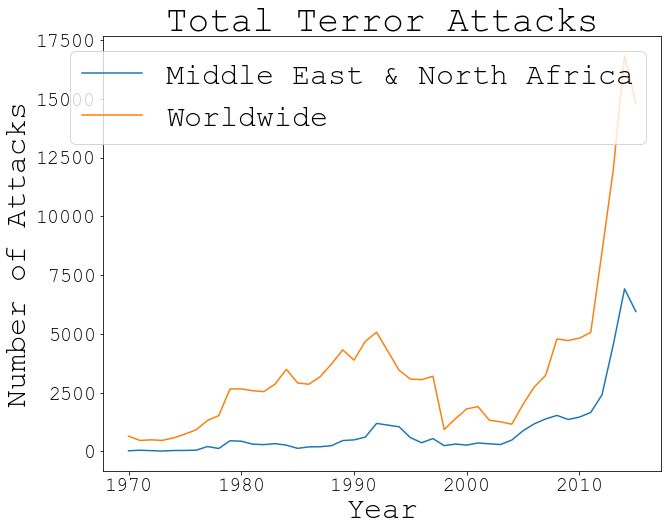

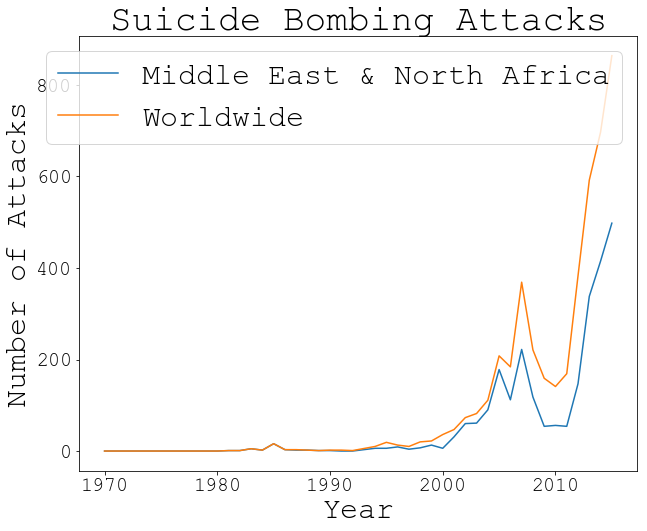

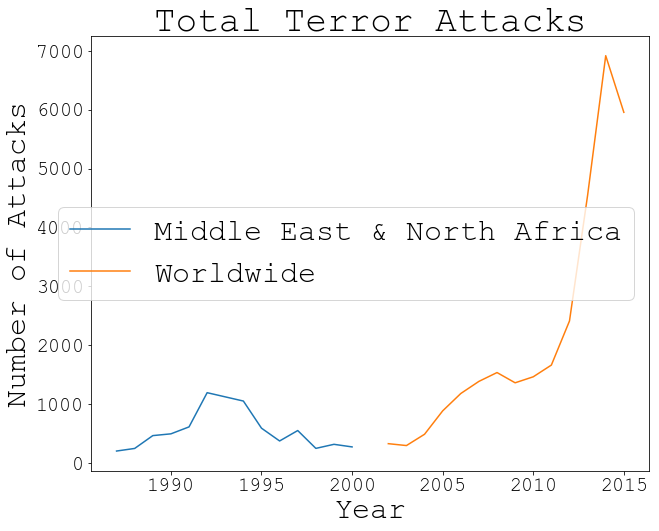

In [34]:
from matplotlib import pyplot as plt


plt.plot(attacks_by_year_middle_east, label="Middle East & North Africa")
plt.plot(attacks_by_year, label="Worldwide")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Total Terror Attacks')
plt.legend()
plt.show()

plt.plot(suicides_by_year_middle_east, label="Middle East & North Africa")
plt.plot(suicides_by_year, label="Worldwide")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Suicide Bombing Attacks')
plt.legend()
plt.show()



plt.plot(before_middle_east, label="Middle East & North Africa")
plt.plot(after_middle_east, label="Worldwide")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Total Terror Attacks')
plt.legend()
plt.show()


I'm going to compare the number of suicide bombings/explosions before and after 9/11. Although 9/11 is classified as 'Hijaking,' it involved suicide of the terrorists. I'm interested to see if the huge attack had any impact on the number of suicide bombings by comparing 10 years before 9/11 and 10 years after 9/11.

In [91]:
from __future__ import division
import numpy as np
import scipy.stats as stats

## Calculate the prior. This will be the probability that Middle Eastern terrorist groups 
mu = np.average(suicides_by_year.suicide)
std = np.std(suicides_by_year.suicide,ddof=1)

# Credible Intervals
stats.bayes_mvs(suicides_by_year.suicide, alpha=0.95)

In [94]:
prior_probability = sum(suicides_by_year.suicide)/len(df)

In [95]:
prior_probability

0.028506365932692061

In [107]:
##### BEFORE 9/11


###
### QUESTION: How do the number of suicide attacks compare from before and after 9/11?
### As this was one of the deadliest attacks in hugely populated areas of the US, and 
### was broadly publicized, I would assume that the number of suicide attacks would increase
### in part to maybe it being 'popularized' or to increase radicalism
###



# number of terror attacks in the middle east in the 14 years before 9/11
num_middle_east = len(df_before[df_before.region_txt=='Middle East & North Africa'])
# number of suicide terror attacks in the middle east in the 14 years before 9/11
num_me_sui = len(df_before[(df_before.region_txt=='Middle East & North Africa')&(df_before.suicide==1)])

# prior: probability of a terror attack in the middle east in the 14 years before 9/11
prior_before = num_middle_east / len(df)
# likelihood: given that there's a terror attack in the 14 years before 9/11, what's the probability that it's a suicide?
likelihood_before = num_me_sui / num_middle_east


##### AFTER 9/11

# number of terror attacks in the middle east in the 14 years after 9/11
num_middle_east = len(df_after[df_after.region_txt=='Middle East & North Africa'])
# number of suicide terror attacks in the middle east in the 14 years after 9/11
num_me_sui = len(df_after[(df_after.region_txt=='Middle East & North Africa')&(df_after.suicide==1)])

# prior: probability of a terror attack in the middle east in the 14 years after 9/11
prior_after = num_middle_east / len(df)
# likelihood: given that there's a terror attack in the 14 years after 9/11, what's the probability that it's a suicide?
likelihood_after = num_me_sui / num_middle_east


######

marginal = likelihood_before*prior_before + likelihood_after*prior_after

posterior_before = likelihood_before*prior_before / marginal
posterior_after = likelihood_after*prior_after / marginal

# probability that there's a suicide attack, given that it's either before or after 9/11
posterior_before, posterior_after

(0.02380952380952381, 0.9761904761904763)

# 3. Impute 1993 Values

In [9]:
impute

,num_attacks
Date,
1970-01-01,333.0
1971-01-01,238.0
1972-01-01,186.0
1973-01-01,149.0
1974-01-01,284.0
1975-01-01,370.0
1976-01-01,419.0
1977-01-01,635.0
1978-01-01,644.0


In [3]:
# Compile list of new dates
dates = []
for i in range(0,len(df)):
    dates.append(str(df.iyear.loc[i])+'-01-01')

# Add Date series to df
# df.drop('Date',axis=1,inplace=True)
df['Date'] = pd.Series(dates)
df.Date = pd.to_datetime(df.Date)

In [75]:
impute = df[['Date','attacktype1']][(df.attacktype1==3)&(df.iyear<=1992)].groupby(['Date']).attacktype1.count().reset_index()
impute.rename(columns={'attacktype1':'num_attacks'},inplace=True)

#converting 'date' column to a datetime type
impute['Date'] = pd.to_datetime(impute['Date'])
# resetting date back to the index
impute.set_index('Date',inplace = True)

In [76]:
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# fit model
impute.num_attacks = impute.num_attacks.astype(float)
model = ARMA(impute, order=(1,0))
model_fit = model.fit()


In [84]:
impute.shape

(23, 1)

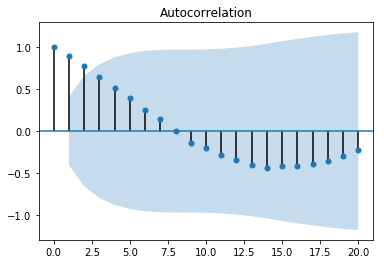

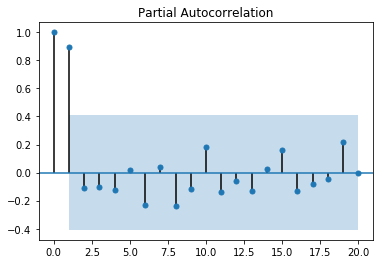

In [83]:
# Look Back 20 months to analyze Autocorr and Partial Autocorr
plot_acf(impute, lags = 20)
plt.show()

plot_pacf(impute, lags = 20)
plt.show()

                              ARMA Model Results                              
Dep. Variable:            num_attacks   No. Observations:                   23
Model:                     ARMA(1, 0)   Log Likelihood                -154.929
Method:                       css-mle   S.D. of innovations            193.289
Date:                Tue, 09 May 2017   AIC                            315.858
Time:                        22:27:57   BIC                            319.264
Sample:                    01-01-1970   HQIC                           316.715
                         - 01-01-1992                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1036.8069    532.177      1.948      0.065      -6.240    2079.854
ar.L1.num_attacks     0.9552      0.048     19.963      0.000       0.861       1.049
                        

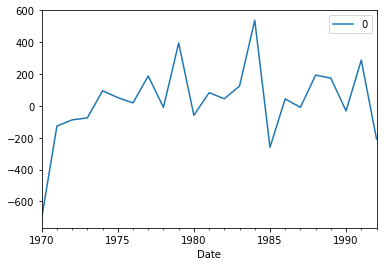

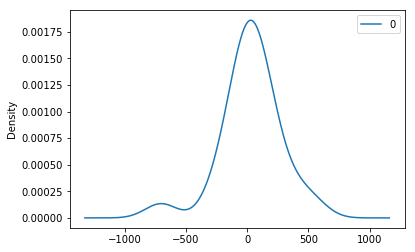

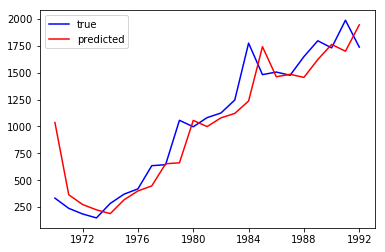

                0
count   23.000000
mean    29.239305
std    242.294648
min   -703.806936
25%    -67.124006
50%     43.964219
75%    149.726465
max    538.381045


In [5]:



print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
plt.plot(impute,color='blue',label='true')
plt.plot(model_fit.fittedvalues, color='red',label='predicted')
plt.legend()
plt.show()
print(residuals.describe())

In [8]:
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample
# get what you need for predicting one-step ahead
params = model_fit.params
residuals = model_fit.resid
p = model_fit.k_ar
q = model_fit.k_ma
k_exog = model_fit.k_exog
k_trend = model_fit.k_trend
steps = 1

_arma_predict_out_of_sample(params, steps, residuals, p, q, k_trend, k_exog, endog=impute, exog=None, start=len(impute))


array([ 1706.55572825])

In [65]:
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot as plt

# not making a pipeline
def impute_attacks(attack_type,step=1):

    impute = df[['Date',
               'attacktype1',
               'attacktype1_txt']][(df.attacktype1==attack_type)&(df.iyear<=1992)].groupby(['Date',
                                                                                            'attacktype1']).attacktype1_txt.count().reset_index()
    impute.rename(columns={'attacktype1_txt':'num_attacks'},inplace=True)
    impute.drop(['attacktype1'],axis=1,inplace=True)
    #converting 'date' column to a datetime type
    impute['Date'] = pd.to_datetime(impute['Date'])
    # resetting date back to the index
    impute.set_index('Date',inplace = True)
    impute.num_attacks = impute.num_attacks.astype(float)
    model = ARMA(impute, order=(1,0))
    model_fit = model.fit()

    params = model_fit.params
    residuals = model_fit.resid
    p = model_fit.k_ar
    q = model_fit.k_ma
    k_exog = model_fit.k_exog
    k_trend = model_fit.k_trend
    steps = step
    
    attack_txt = df.attacktype1_txt[df.attacktype1==attack_type].unique()[0]
    return attack_txt, _arma_predict_out_of_sample(params, steps, residuals, p, q, k_trend, k_exog, endog=impute, exog=None, start=len(impute))[0]
    


In [54]:
predicted = []
for attack_type in (df.attacktype1.unique()):
    predicted.append(impute_attacks(attack_type))
predicted

[('Assassination', 1067.1782263720099),
 ('Hostage Taking (Kidnapping)', 133.04892096473492),
 ('Bombing/Explosion', 1706.5538798574999),
 ('Facility/Infrastructure Attack', 452.21814567260805),
 ('Armed Assault', 1301.6908757374456),
 ('Hijacking', 17.084018046975675),
 ('Unknown', 143.24305023041143),
 ('Unarmed Assault', 43.069856226792346),
 ('Hostage Taking (Barricade Incident)', 22.210932814963762)]

In [50]:
df.attacktype1_txt[df.attacktype1==attack_type].unique()[0]

'Hostage Taking (Barricade Incident)'

In [56]:
predicted = pd.DataFrame(predicted,columns=['Attack Type','2013 Predicted Number of Attacks'])

In [57]:
predicted.sum()

Attack Type                         AssassinationHostage Taking (Kidnapping)Bombin...
2013 Predicted Number of Attacks                                               4886.3
dtype: object

In [60]:
impute = df[['Date',
               'attacktype1']][(df.iyear<=1992)].groupby(['Date']).attacktype1.count().reset_index()


In [69]:
predicted = []
for attack_type in (df.attacktype1.unique()):
    predicted.append(impute_attacks(attack_type,12))
predicted

[('Assassination', 1067.1816900033109),
 ('Hostage Taking (Kidnapping)', 133.04897508559424),
 ('Bombing/Explosion', 1706.5557282541256),
 ('Facility/Infrastructure Attack', 452.21814567260805),
 ('Armed Assault', 1301.6908757374456),
 ('Hijacking', 17.084018046975675),
 ('Unknown', 143.24305023041143),
 ('Unarmed Assault', 43.069856226792346),
 ('Hostage Taking (Barricade Incident)', 22.210932814963762)]

In [70]:
predicted = pd.DataFrame(predicted,columns=['Attack Type','2013 Predicted Number of Attacks'])
predicted.sum()

Attack Type                         AssassinationHostage Taking (Kidnapping)Bombin...
2013 Predicted Number of Attacks                                               4886.3
dtype: object

In [67]:
df[['Date',
               'attacktype1']][(df.iyear>1993)].groupby(['Date']).attacktype1.count().reset_index()

,Date,attacktype1
0,1994-01-01,3458
1,1995-01-01,3081
2,1996-01-01,3056
3,1997-01-01,3200
4,1998-01-01,933
5,1999-01-01,1396
6,2000-01-01,1813
7,2001-01-01,1908
8,2002-01-01,1332
9,2003-01-01,1262


In [20]:
bombings = df[['iyear','country_txt','latitude','longitude','attacktype1_txt']][df.attacktype1_txt=='Bombing/Explosion']
bombings = bombings.groupby(['iyear','country_txt','latitude','longitude']).attacktype1_txt.count().reset_index()

In [ ]:
bombings = bombings.merge(world[['name','geometry','iso_a3','pop_est']],how='left', left_on='country_txt', right_on='name').drop('name',axis=1)

In [ ]:
bombings.dropna(inplace=True)
type(bombings)

In [43]:
import os
import pandas as pd
import numpy as np
from random import randint, uniform
from datetime import datetime
from urllib import urlretrieve
from zipfile import ZipFile
import pysal

# geo stuff
import geopandas as gpd
from shapely.geometry import Point
# from ipyleaflet import (Map,
#     Marker,
#     TileLayer, ImageOverlay,
#     Polyline, Polygon, Rectangle, Circle, CircleMarker,
#     GeoJSON,
#     DrawControl
# )

# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (20.0, 20.0)

# widget stuff
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

# progress stuff
from tqdm import tqdm_notebook, tqdm_pandas

# turn warnings off
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pysal
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
terror = pd.read_csv('/Users/jennydoyle/Desktop/dsi/04-project-assets/globalterrorismdb_0616dist.csv')


fix_names = {'Dem. Rep. Korea':'South Korea',
'Korea':'North Korea',
'Czech Rep.':'Czech Republic',
'Bosnia and Herz.':'Bosnia-Herzegovina',
'Bosnia and Herzegovina':'Bosnia-Herzegovina',
'Central African Rep.': 'Central African Republic',
 'Dem. Rep. Congo':  'Congo',
'Lao PDR':'Laos',
'Slovakia':'Slovak Republic'}

world.name.replace(fix_names, inplace=True)

fix_countries = {'Democratic Republic of the Congo':'Congo',
"People's Republic of the Congo"  :'Congo',
'Republic of the Congo':'Congo',
'Dominica':'Dominican Rep.',
'Dominican Republic':'Dominican Rep.',
'Czechoslovakia': 'Czech Republic',
'East Germany (GDR)':'Germany',
'East Timor':'Timor-Leste', 
'Equatorial Guinea':'Eq. Guinea',                
'Falkland Islands':'Falkland Is.',
'Hong Kong':'China',
'North Yemen':'Yemen',
'Serbia-Montenegro':'Serbia',
'Solomon Islands':'Solomon Is.',
'South Sudan':'Sudan',
'South Vietnam':'Vietnam',
'South Yemen':'Yemen',
'Soviet Union':'Russia',
'West Germany (FRG)':'Germany',                 
'Western Sahara':'W. Sahara'}

terror.country_txt.replace(fix_countries, inplace=True)


terror_grouped = terror.groupby('country_txt').count().reset_index()
terror_grouped = terror_grouped[['country_txt','eventid']]
terror_grouped.rename(columns={'eventid':'Num_Tattacks'},inplace=True)

world_terror = world.merge(terror_grouped, left_on='name', right_on='country_txt')

q10 = pysal.Quantiles(world_terror.Num_Tattacks,k=10)
f, ax = plt.subplots(1, figsize=(20,10))
world_terror.assign(cl=q10.yb).plot(column='Num_Tattacks', categorical=True, cmap='OrRd', linewidth=0.1, ax=ax, k=10, scheme='QUANTILES')
ax.set_axis_off()
plt.show()

# http://darribas.org/gds_scipy16/ipynb_md/02_geovisualization.html

In [ ]:
def make_plot(year=1970):

    # filter dataframe
    temp = world_terror[world_terror['iyear']==year]
    
    q10 = pysal.Quantiles(temp.Num_Tattacks,k=10)
    f, ax = plt.subplots(1, figsize=(20,10))
    temp.assign(cl=q10.yb).plot(column='Num_Tattacks', categorical=True, cmap='OrRd', linewidth=0.1, ax=ax, k=10, scheme='QUANTILES')
    ax.set_axis_off()
    plt.show()

In [ ]:
terror_grouped = terror[terror.attacktype1_txt=='Bombing/Explosion'].groupby(['country_txt','iyear']).count().reset_index()
terror_grouped = terror_grouped[['country_txt','iyear','eventid']]
terror_grouped.rename(columns={'eventid':'Num_Tattacks'},inplace=True)

world_terror = world.merge(terror_grouped, left_on='name', right_on='country_txt')



# http://darribas.org/gds_scipy16/ipynb_md/02_geovisualization.html





# create widget
interact(make_plot, year=(1970, 2015, 1))




AttributeError: Unknown property column

<function __main__.make_plot>

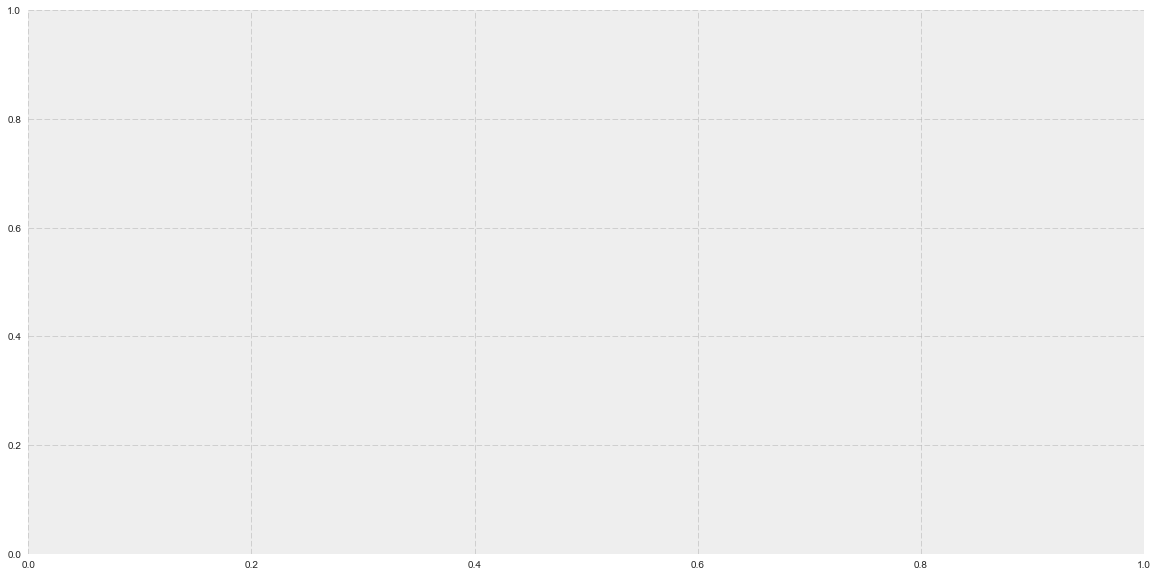

In [56]:


def make_plot(year=1970):

    temp = suicides_by_year_middle_east.reset_index()
    temp = temp[temp.iyear==year]
    world_terror = world.merge(terror_grouped, left_on='name', right_on='country_txt')
    q10 = pysal.Quantiles(temp.suicide,k=10)
    f, ax = plt.subplots(1, figsize=(20,10))
    temp.assign(cl=q10.yb).plot(column='suicide', categorical=True, cmap='OrRd', linewidth=0.1, ax=ax, k=10, scheme='QUANTILES')
    ax.set_axis_off()
    plt.show()
    
interact(make_plot, year=(1970, 2015, 1))

# II. Bayseian Inference

- Construct a prior about the amount of terror a given area has seen
- Update that prior with new information (like a new year of attacks or a contrasting country from within the same region).

- Compare two populations of your choosing using Bayesian inference. We want to know if the amount of terror one area has seen differs in a significant way than another area (or time period!)

For example, if you are interested in knowing if one country in South America differs in a significant way from another area, you may:

- make your prior assume that some country is a country in South America with μ average attacks and σ variation across South American countries
- update that prior with the information of a single country in South America as well as a separate country in South America
- How significantly do the resulting posteriors differ? (An important assumption made here is that the time periods are being held constant, perhaps a single year.)

- Structure your own test of populations rather than using the above example. If you're unable to setup a different test, brainstorm with your squad in the Slack chat.

- Justify the prior you selected and interpret your results (use credible intervals.) 
- Remember you can attempt to use different priors (but don't "prior hack" to affect your output!)

In [ ]:
import math
import scipy.integrate as integrate
from scipy.stats import beta

# UN comment to get the error 
#1/my_beta(141, 263)
def func1(x):
    return (x)**263*(1-x)**141

def log_beta(a,b):
    beta_num = math.exp(math.lgamma(a) + math.lgamma(b) - math.lgamma(a+b))
    return beta_num

log_beta(141,263)*integrate.quad(lambda x: func1(x) ,0, .65)[0]

We see that the $P(\theta \le .65)$ is very close to 0, and therefore we believe the poll did not provide "good" information with respect to the actual electoral results

Iraq and Pakistan, 2014